In [1]:
import awkward as ak
import numpy as np
import pickle
%matplotlib inline

# from hist import intervals
import matplotlib.pyplot as plt
import matplotlib as mpl

import subprocess
import sys

#### If running on ROOT casa image some packages necessary for opening our files and plotting are not installed

def install_package(package_name):
    # Install the package using subprocess to call pip
    subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])

def import_packages():
    try:
        import mplhep  # Replace with the module name of the package
    except ImportError:
        print(f"{'mplhep'} not found. Installing...")
        install_package("mplhep")
        import mplhep  # Import again after installation
    try:
        import hist  # Replace with the module name of the package
    except ImportError:
        print(f"{'hist'} not found. Installing...")
        install_package("hist")
        import hist  # Import again after installation
    try:
        import coffea  # Replace with the module name of the package
    except ImportError:
        print(f"{'coffea'} not found. Installing...")
        install_package("coffea==0.7.22")
        import coffea  # Import again after installation
        
        
import_packages()

In [12]:
import mplhep as hep
hep.style.use("CMS")
plt.style.use([hep.style.CMS, hep.style.firamath])
from python.plotting import plotDataMC, plotDataMCwErrors

In [13]:
channel = "dijet"
if channel == "dijet":
    fname_p = 'coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_MG_nominal__allUncALL.pkl'
    fname_d = "coffeaOutput/dijetHists_newUL18JECaddRho_JetHT_rap2.5_allUncALL.pkl"
    fname_h = "coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_herwig_nominal__allUncALL.pkl"
    fname_jk = 'coffeaOutput/dijetHists_newUL18JECaddRho_QCDsim_rap2.5_MG_nominal_JK_allUncALL.pkl'
else:
    fname_p = 'coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_allUncALL.pkl'
    fname_d = "coffeaOutput/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
    fname_h = "coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalherwig_allUncALL.pkl"
    fname_jk = 'coffeaOutput/trijetHists_newUL18JECaddRho_QCDsim_rap2.5_nominalMG_JKallUncALL.pkl'
# fname_h = "coffeaOutput/trijetHists_newUL18JECaddRho_JetHT_rap2.5_nominalMG_allUncALL.pkl"
with open(fname_d, "rb") as f:
    result_data = pickle.load( f )
if "APV" in fname_p:
    year = fname[-11:-4]
elif "ALL" in fname_p:
    year = "UL Run 2"
else:
    year = fname[-8:-4]
with open(fname_p, "rb") as f:
    result_mc = pickle.load( f )
with open(fname_h, "rb") as f:
    result_herwig = pickle.load( f )
os_path = 'plots/comparison/dijet/'

# print(result_mc["cutflow"])
# print(result_mc["jet_rap_reco"].axes)
# print(result_mc["ptgen_mgen_u"].axes)
print(result_mc.keys())
# print(result_data["jet_rap_reco"].axes)
# df = pd.DataFrame.from_dict(result_mc['cutflow'])
# display(df)
# df_data = pd.DataFrame.from_dict(result_data['cutflow'])
# display(df_data)

dict_keys(['misses', 'misses_g', 'fakes', 'fakes_g', 'underflow', 'underflow_g', 'weights', 'ptreco_mreco_u', 'ptreco_mreco_g', 'rho_reco_u', 'rho_reco_g', 'ptgen_mgen_u', 'ptgen_mgen_g', 'response_rho_u', 'response_rho_g', 'response_matrix_u', 'response_matrix_g', 'cutflow', 'jkflow', 'sdmass_orig', 'sdmass_ak8corr', 'sdmass_ak4corr', 'njet_reco', 'njet_gen', 'jet_rap_reco', 'jet_rap_gen', 'jet_phi_gen', 'jet_phi_reco', 'jet_eta_phi_precuts', 'jet_eta_phi_preveto', 'jet_eta_phi', 'dphi_gen', 'dphi_reco', 'asymm_gen', 'asymm_reco', 'jet_dr_gen_subjet', 'dijet_dr_reco_to_gen', 'dr_reco_to_gen_subjet', 'fakes_eta_phi', 'fakes_asymm_dphi'])


In [14]:
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges from data hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges from data hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges dervied from mc hist:  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 13000.0]
Edges from data hist:  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 13000.0]
Edges dervied from mc hist:  [0.0, 5.0, 10.0, 15.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 125.0, 150.0, 175.0, 200.0, 250.0, 300.0, 800.0, 1300.0]
Edges from data hist: 

/home/cms-jovyan/GluonJetMass/python/plotting.py:594: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py:594: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py:594: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py:594: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py

Data values  [4.08610000e+04 3.81924200e+06 3.56948630e+07 1.74263707e+08
 1.17353701e+09 1.94585164e+09 1.87345687e+09 1.42836106e+09
 1.01551946e+09 7.11739140e+08 4.93715519e+08 3.27941391e+08
 3.80707280e+08 1.16311760e+08 3.91770290e+07 1.50000340e+07
 8.91703300e+06 1.99657000e+06 8.29025000e+05 2.07000000e+02]  and variances  [1.81733403e+04 3.22763545e+05 9.78250945e+05 2.13869920e+06
 5.42826793e+06 6.67837323e+06 6.26158026e+06 5.19287977e+06
 4.29555017e+06 3.48280375e+06 2.75861626e+06 2.13026501e+06
 1.85150980e+06 5.26124923e+05 1.68440782e+05 6.58628608e+04
 2.49324184e+04 5.71370073e+03 1.50856588e+03 1.43874946e+01]


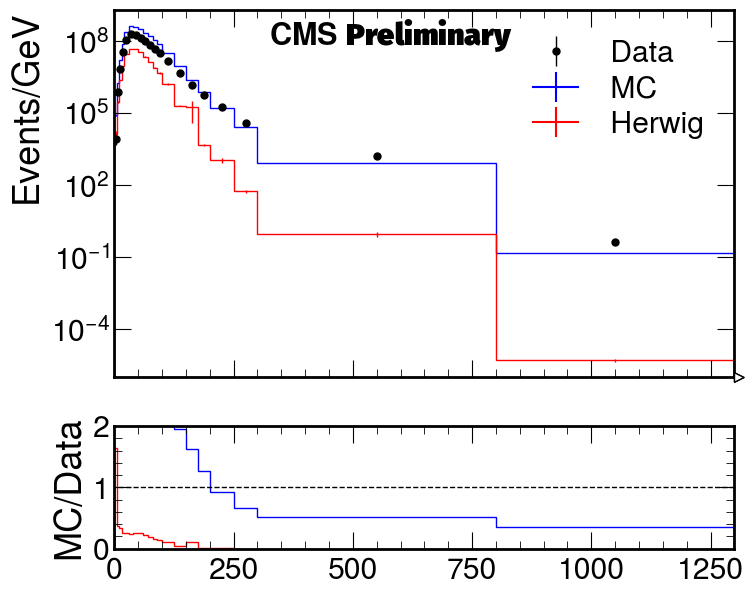

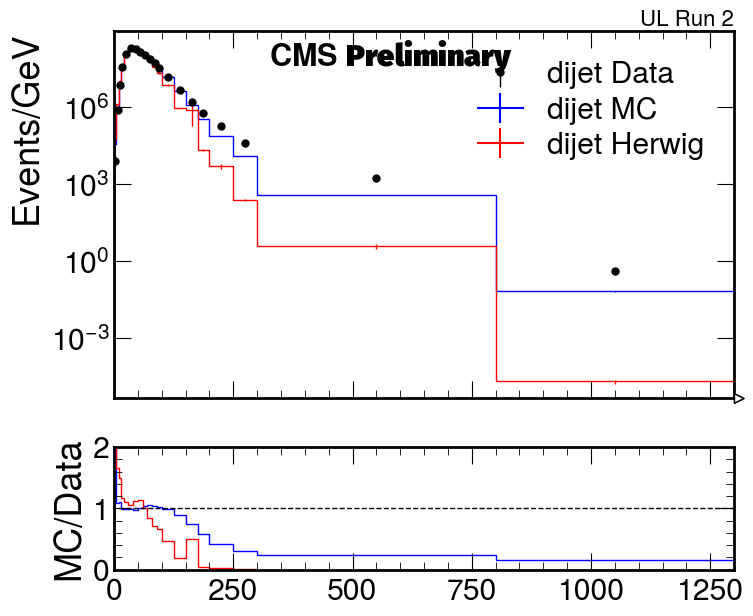

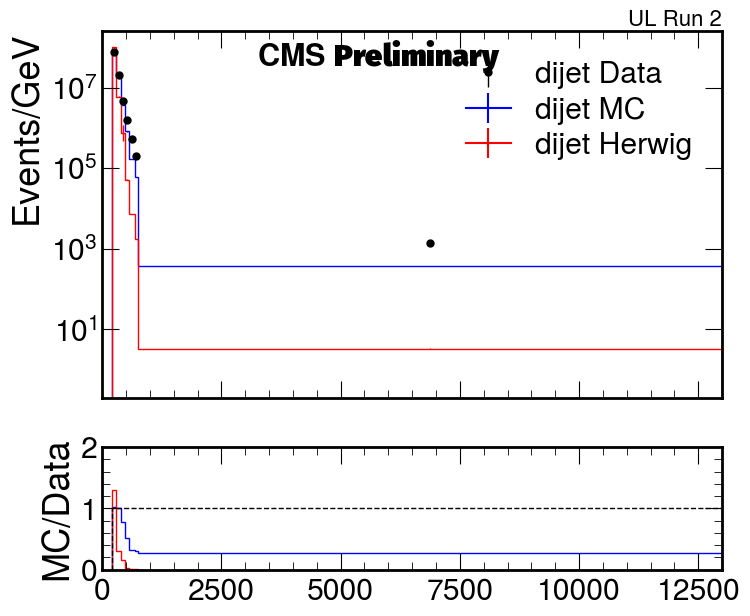

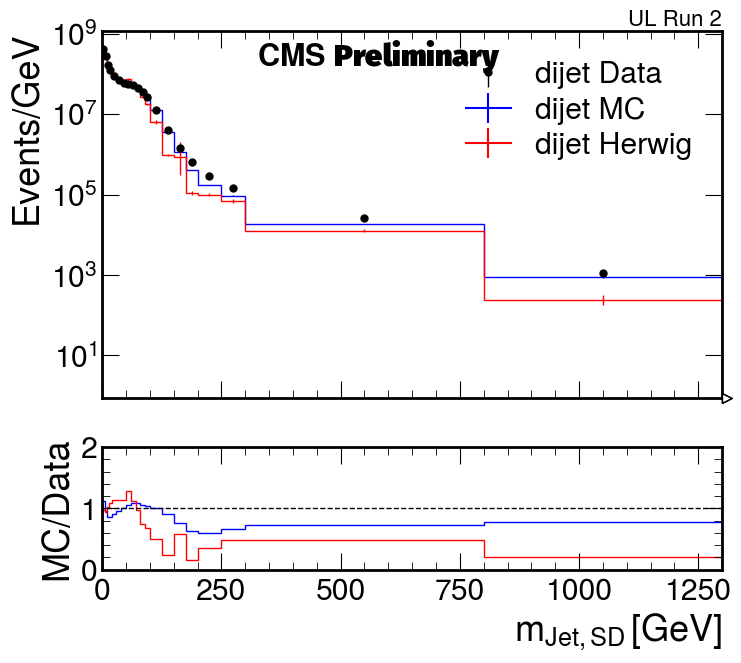

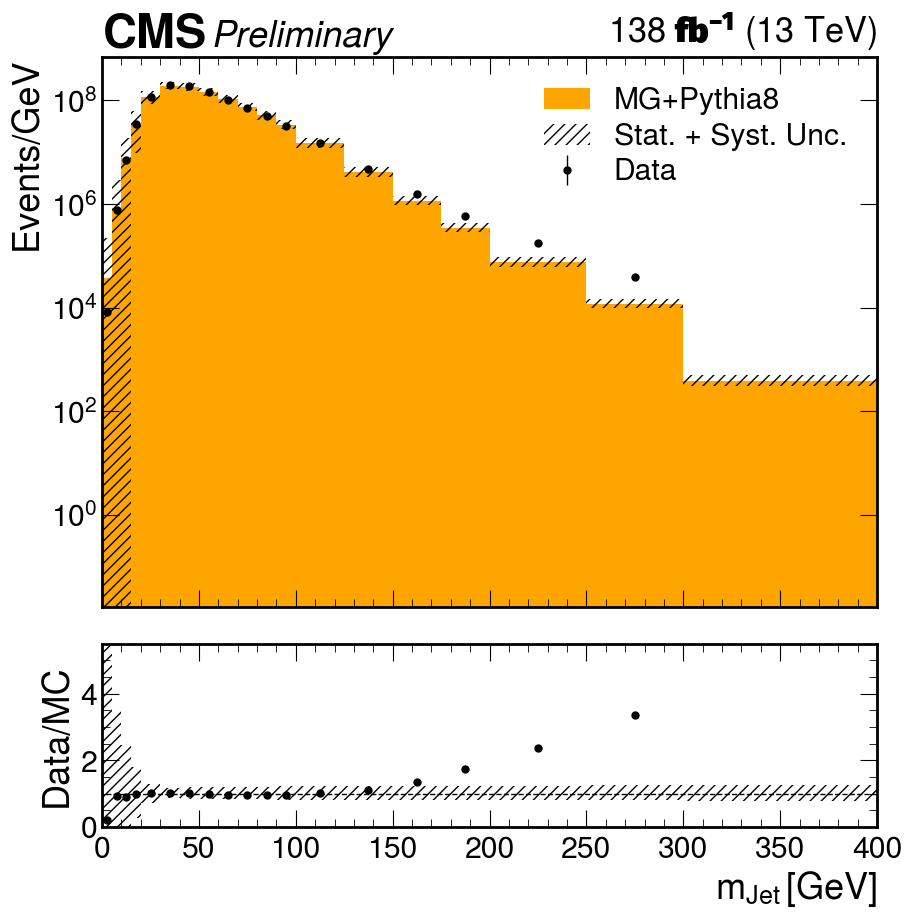

/home/cms-jovyan/GluonJetMass/python/plotting.py:448: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))


Data values  [2.04116643e+09 1.36537770e+09 8.21120991e+08 6.09481459e+08
 9.10670002e+08 7.00635620e+08 6.06828933e+08 5.68841874e+08
 5.25884147e+08 4.54573815e+08 3.63084044e+08 2.58794504e+08
 3.14347974e+08 1.02466882e+08 3.66304840e+07 1.63675020e+07
 1.41287980e+07 7.07905800e+06 1.27991460e+07 5.59695000e+05]  and variances  [6301876.08954476 5291128.21096872 4182283.55225408 3540933.16895631
 4359647.40169042 3842833.31531332 3647220.66972277 3496947.97610688
 3337534.019718   3054126.20181239 2570591.87849141 2037322.49329801
 1743635.17330146  561794.87146467  245020.48691079  213811.99913475
  378678.61705937  280521.4399578   335774.93513066   21980.40606995]


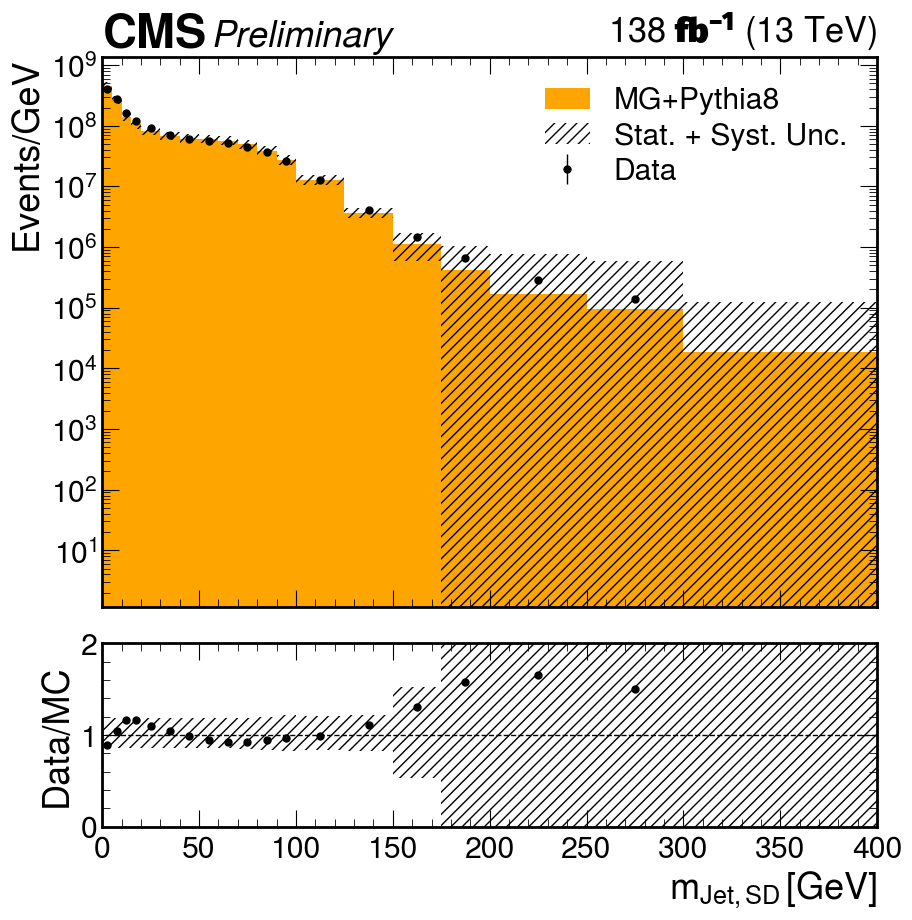

Trimming last bin to be size of second to last bin
Original widths  [   90.   110.    80.    90.   110.    80. 12240.]
Original edges  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 13000.0]
New widths  [ 90. 110.  80.  90. 110.  80. 490.]
New edges  [200.0, 290.0, 400.0, 480.0, 570.0, 680.0, 760.0, 1250.0]
Data values  [6.92005264e+09 2.21825401e+09 3.74468142e+08 1.42430402e+08
 5.81260770e+07 1.61906340e+07 1.73578000e+07]  and variances  [1.37176780e+07 2.00146030e+06 3.84278807e+05 1.16234525e+05
 4.17581355e+04 1.09062674e+04 4.16653093e+03]
new ticks  [200.0, 400.0, 600.0, 800.0, 1000.0, 1200.0, '$\\infty$']


/home/cms-jovyan/GluonJetMass/python/plotting.py:448: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))


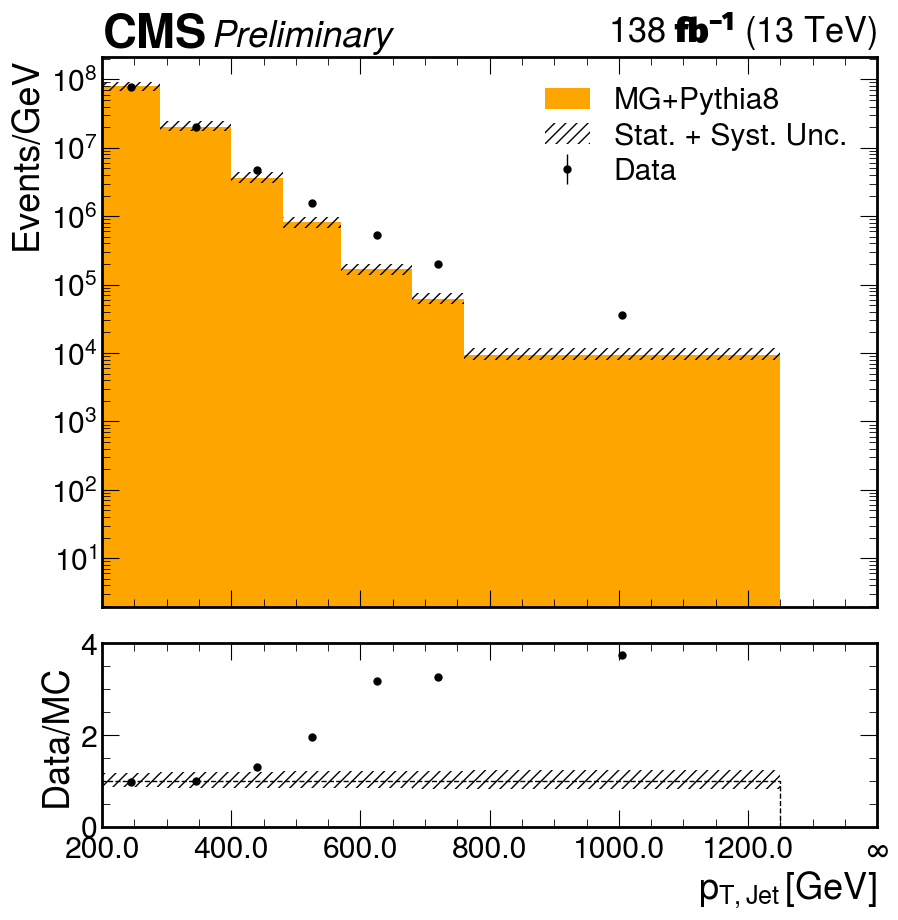

/home/cms-jovyan/GluonJetMass/python/plotting.py:448: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py:452: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim[0], ylim[1])


Data values  [8.10156810e+07 2.09554765e+08 2.63351556e+08 3.16767208e+08
 3.73866222e+08 4.06090253e+08 4.56583157e+08 5.11528758e+08
 5.51025774e+08 5.77424522e+08 6.05556696e+08 6.09755764e+08
 6.05562836e+08 6.07579070e+08 5.94845789e+08 5.69580513e+08
 5.48159657e+08 5.03393188e+08 4.46069904e+08 4.07308606e+08
 3.83855713e+08 3.13277341e+08 2.62503615e+08 1.96788509e+08
 7.18180270e+07]  and variances  [1322168.15026796 2034418.35236585 2263178.79539907 2468445.17133316
 2683683.48464755 2786275.19213824 3028342.98587412 3165024.09919798
 3294128.02452242 3414896.69609756 3497238.69975156 3450453.15375416
 3388254.95196893 3475703.94583486 3443773.63394184 3356684.35914803
 3309569.7146667  3114323.639139   2918240.19701018 2769646.8736783
 2706041.34620168 2411105.46233859 2286906.08294329 1918096.68185444
 1192217.05507135]
2.5


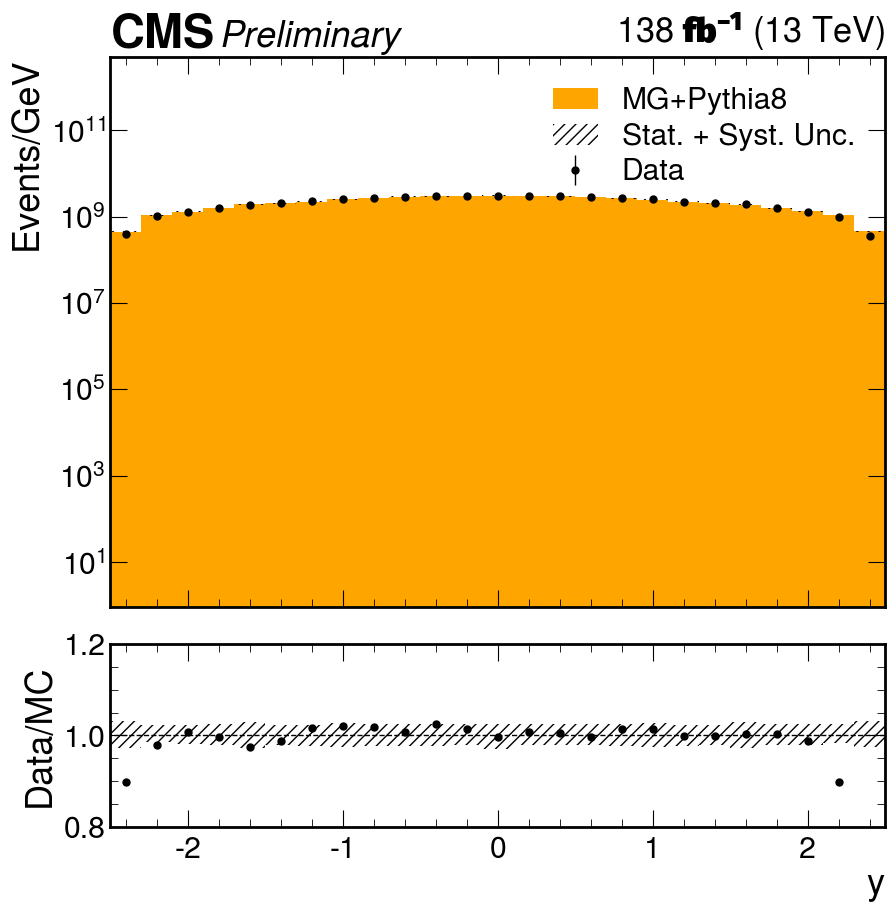

/home/cms-jovyan/GluonJetMass/python/plotting.py:448: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.ticker.AutoMinorLocator'>
  ax.yaxis.get_minor_locator().set_params(numticks=999, subs=(.2, .4, .6, .8))
/home/cms-jovyan/GluonJetMass/python/plotting.py:452: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(ylim[0], ylim[1])


Data values  [4.26219664e+08 4.29332980e+08 4.09893592e+08 4.15079064e+08
 4.15199324e+08 4.20345773e+08 4.10328592e+08 4.09250699e+08
 4.16794708e+08 4.25832630e+08 4.28265218e+08 4.23449147e+08
 4.23228741e+08 4.32035918e+08 4.13467597e+08 4.01241577e+08
 4.18573185e+08 4.21507750e+08 4.17708248e+08 4.10154183e+08
 4.11424643e+08 4.24762558e+08 4.33807699e+08 4.14962218e+08
 4.19544979e+08]  and variances  [2953996.75442577 2920389.5300956  2812880.76114612 2878904.43970723
 2866603.62788021 2864302.73472149 2776186.79804836 2811819.83597474
 2823364.78712404 2853383.21759556 2920379.09727453 2873082.93931119
 2907132.72646348 2932632.92851935 2864474.3210783  2827014.37380163
 2874056.20334937 2854195.82376753 2844490.17228677 2811779.61871819
 2808550.30931849 2832284.05730004 2901802.77297252 2855101.08419089
 2890532.42612966]


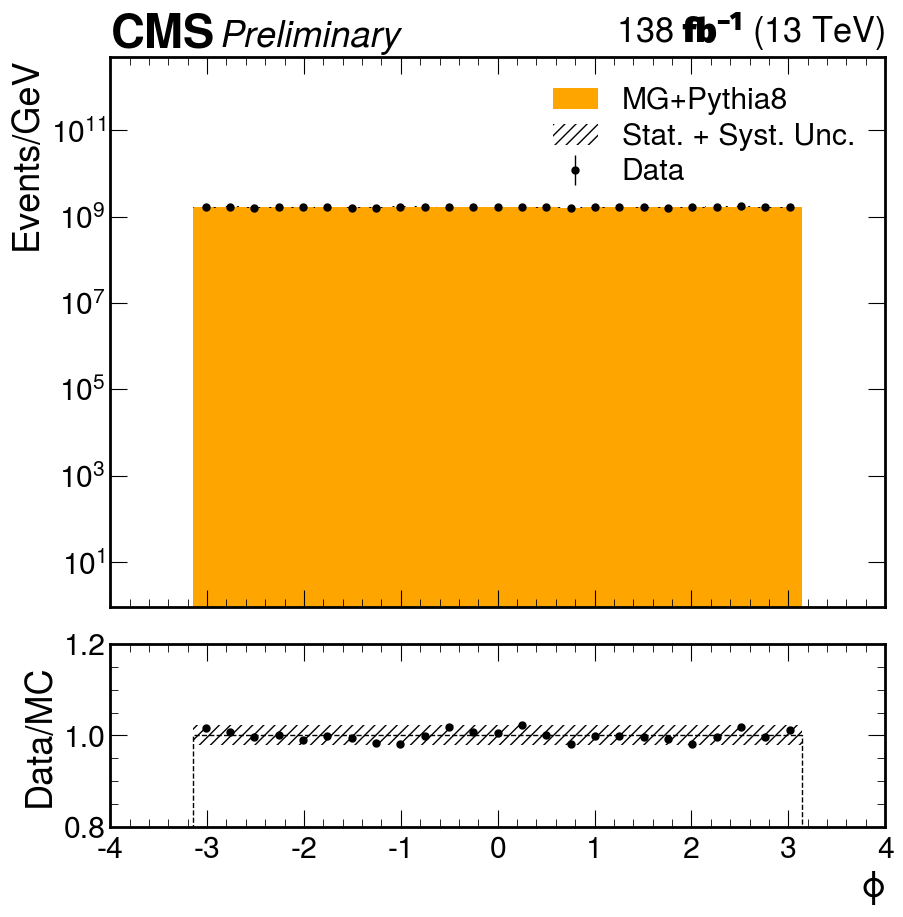

In [16]:

plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco",result_herwig = result_herwig,norm=False)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", result_herwig = result_herwig, IOV=year, channel = channel, norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "ptreco", result_herwig = result_herwig,IOV=year, channel =channel ,norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", result_herwig=result_herwig,
        IOV=year, channel = "dijet", norm=True,x_lim=1300.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=year, rax_lim = [0.,5.5], channel = channel, norm=True, xlim=400.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=year, rax_lim = [0.,2.0], channel = channel, norm=True, xlim=400.)
plotDataMCwErrors(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=year, rax_lim = [0.,4.], channel = channel, norm=True, trim=1250.)
plotDataMCwErrors(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True,ylim = [0, 5e12])
plotDataMCwErrors(result_mc, result_data, "jet_phi_reco", 'jet_phi_reco', "phi", IOV=year, rax_lim = [0.8,1.2], channel = channel, norm=True, ylim = [0, 5e12], xlim=4.)
#plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_gen', "frac",  IOV=2018, channel = "dijet")


In [6]:
#### Plot dijet systematics
def comparePlots(hists, denom_hist, axVar):
    axVar = "mgen"
    edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
    availAxes = [ax.name for ax in result_mc[histname].axes]
    availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    print([ax for ax in result_mc[histname].project("syst").axes[0]])
    print("Available axes: ", availAxes)
    print("Available systs ", availSysts)
    fig, (ax, rax) = plt.subplots(
                    nrows=2,
                    ncols=1,
                    figsize=(7,7),
                    gridspec_kw={"height_ratios": (3, 1)},
                    sharex=True)
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    ax.set_xlim(0, 1000)
    rax.set_xlim(0, 1000)
    histname="ptgen_mgen_u"
    hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
    # histname = "fakes"
    # axVar="mreco"
    # print(result_mc[histname])
    # availAxes = [ax.name for ax in result_mc[histname].axes]
    # availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
    # print([ax for ax in result_mc[histname].project("syst").axes[0]])
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
    #              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
    ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values(),
                          out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                          where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
    hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
    hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)

(0.0, 2.0)

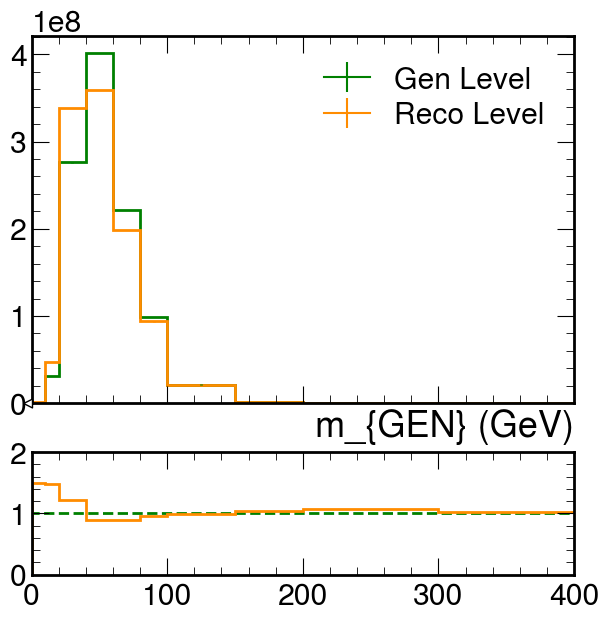

In [7]:
#### Plot gen vs reco
histname="response_matrix_u"
axVar = "ptgen"
pt_edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]

axVar = "mgen"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hist1 = result_mc[histname][{'syst':"nominal"}].project(axVar)
hep.histplot(hist1, stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'Green', linewidth=2, label = 'Gen Level')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 400)
rax.set_xlim(0, 400)
axVar = "mreco"
hist2 = result_mc[histname][{'syst':"nominal"}].project(axVar)[::2j]
hep.histplot(hist2, stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'darkorange', linewidth=2, label = "Reco Level")
ratio = np.divide(hist2.values(),hist1.values(),
                      out=np.empty(np.array(hist1.values()).shape).fill(np.nan),
                      where=hist1.values()!= 0,)
hep.histplot(np.ones_like(ratio), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'green', linewidth=2)
hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'darkorange', linewidth=2)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 2.0)

[200, 290, 480, 570, 680, 13000]


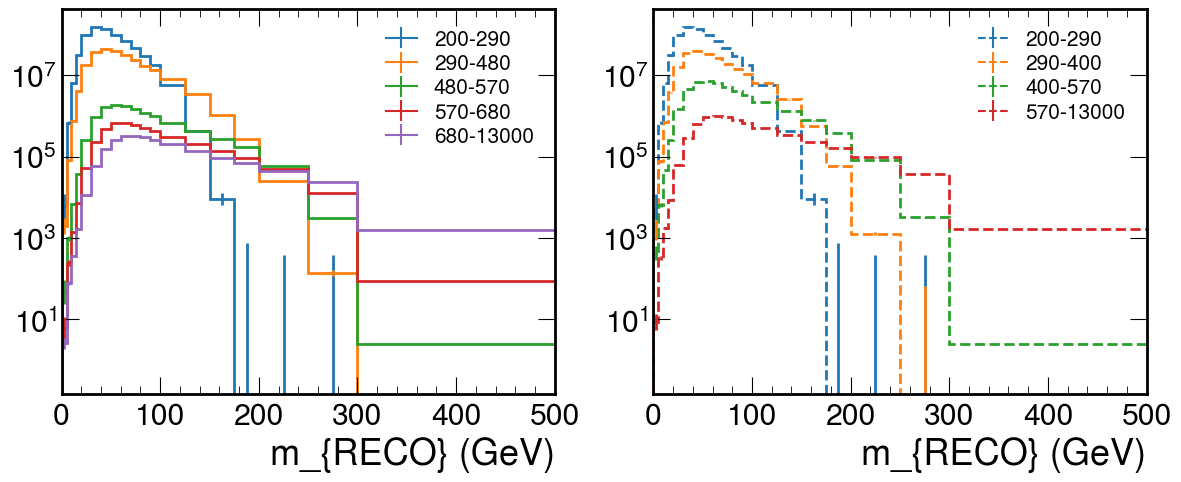

In [8]:
#### Plot trijet vs dijet pt spectra
from unfold.unfold_utils.integrate_and_rebin import *
colormap = plt.cm.tab10.colors  
histname="ptreco_mreco_u"
axVar = "ptreco"
pt_edges = [200, 290, 480, 570, 680, 13000]
hist_rebin = rebin_hist(result_data[histname], 'ptreco', pt_edges)
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print(pt_edges)
axVar = "mreco"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
fig, (ax, rax) = plt.subplots(
                nrows=1,
                ncols=2,
                figsize=(14,5),
                sharex=True)
for i in range(len(pt_edges)-1):
    hist1 = hist_rebin[{'syst':"nominal", "ptreco":i}].project(axVar)
    hep.histplot(hist1, stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = colormap[i], linewidth=2, label = str(pt_edges[i])+"-"+str(pt_edges[i+1]))
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    ax.set_xlim(0, 500)
    rax.set_xlim(0, 500)
pt_edges = [200, 290, 400, 570, 13000]
hist_rebin = rebin_hist(result_data[histname], 'ptreco', pt_edges)
for i in range(len(pt_edges)-1):
    hist2 = hist_rebin[{'syst':"nominal", "ptreco":i}].project(axVar)
    hep.histplot(hist2, stack=False, histtype='step', binwnorm=True, 
                 ax=rax, color = colormap[i], linestyle = "--", linewidth=2, label=str(pt_edges[i])+"-"+str(pt_edges[i+1]))
leg = ax.legend(loc='best', labelspacing=0.25, fontsize='xx-small')
rax.legend(loc='best', labelspacing=0.25, fontsize='xx-small')
leg.set_visible(True)
ax.set_yscale('log')
rax.set_yscale('log')


Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([0, 5, 10, 15, 20, 30, 40, 50, 60, 70, 80, 90, 100, 125, 150, 175, 200, 250, 300, 800, 1300], name='mreco', label='m_{RECO} (GeV)'),
  Variable([200, 290, 400, 480, 570, 680, 760, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.60934e+08, variance=1.28136e+09)


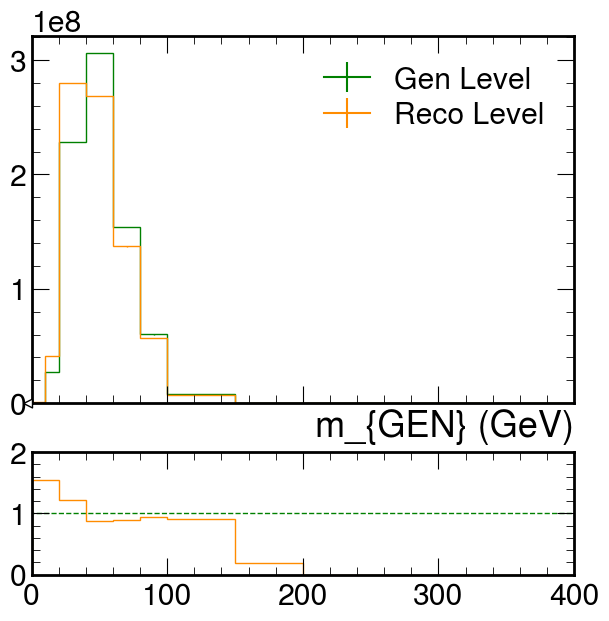

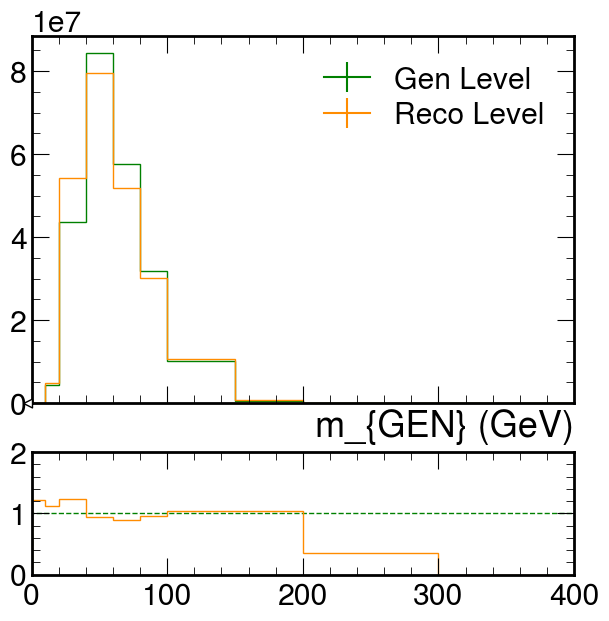

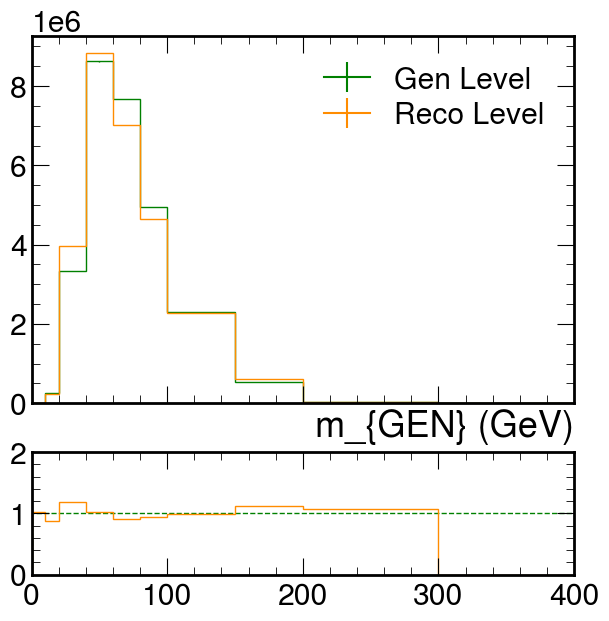

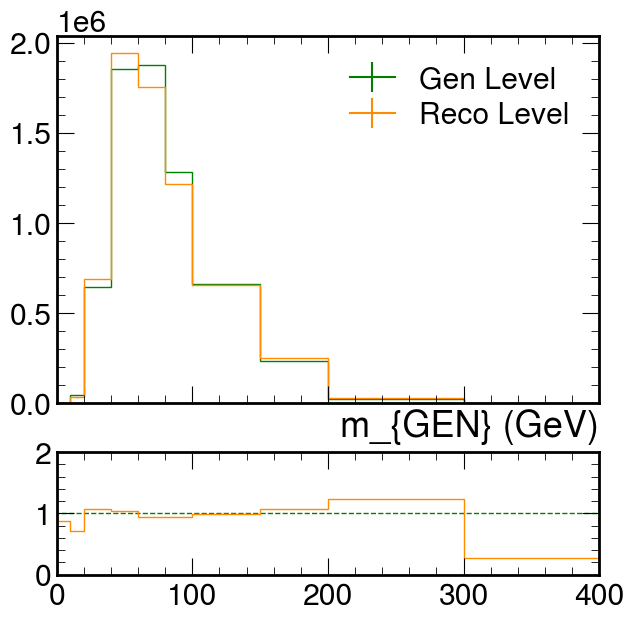

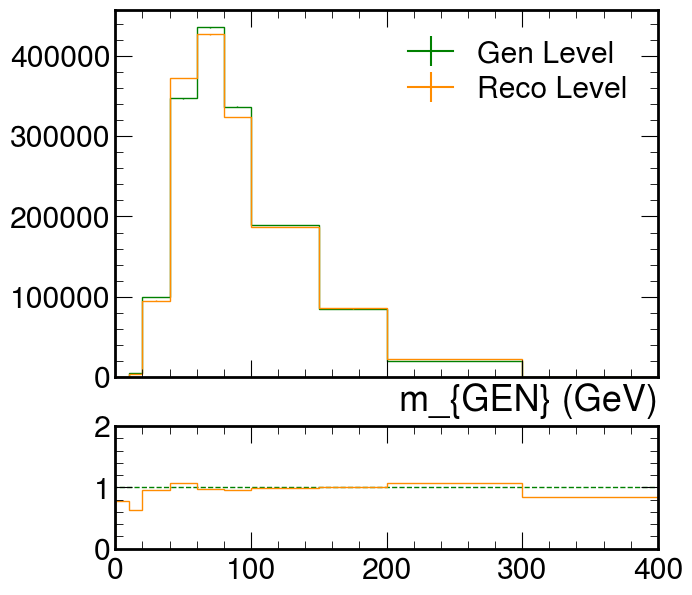

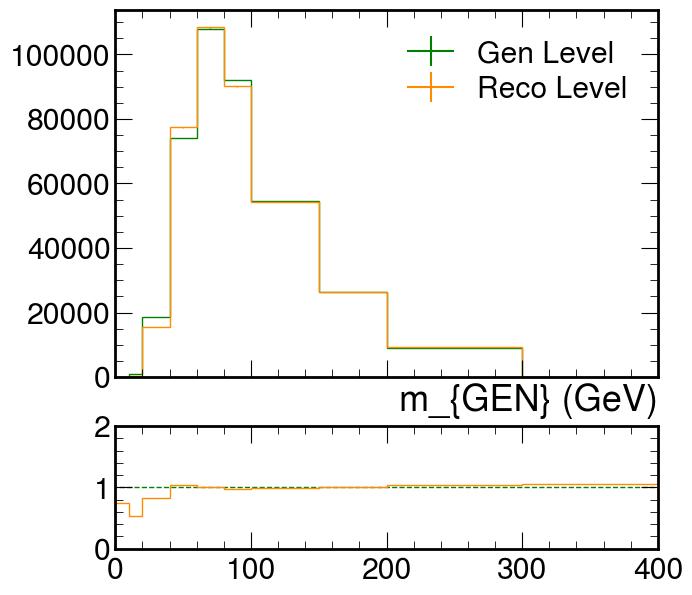

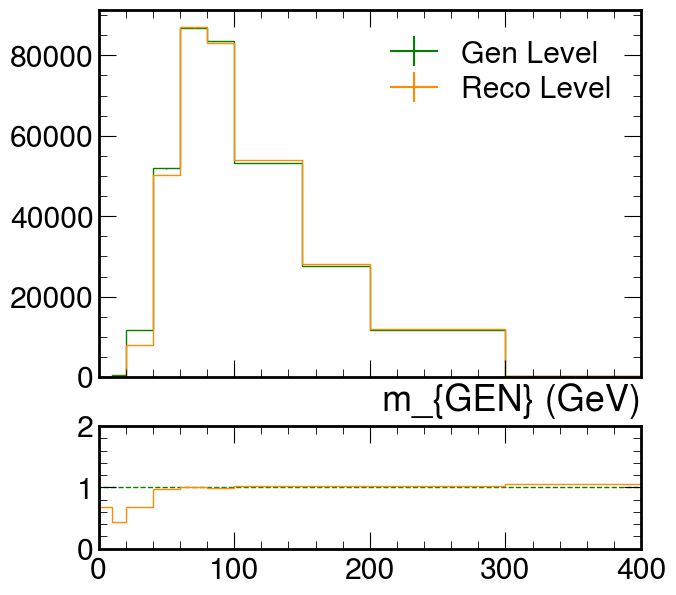

In [9]:
#### Plot dijet systematics
histname="response_matrix_u"
axVar = "ptgen"
pt_edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print(result_mc[histname][{'syst':"nominal", 'ptreco':i}])
for i in range(len(pt_edges)-1):
    axVar = "mgen"
    edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
    fig, (ax, rax) = plt.subplots(
                    nrows=2,
                    ncols=1,
                    figsize=(7,7),
                    gridspec_kw={"height_ratios": (3, 1)},
                    sharex=True)
    hist1 = result_mc[histname][{'syst':"nominal", 'ptreco':i}].project(axVar)
    hep.histplot(hist1, stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'Green', linewidth=1, label = 'Gen Level')
    # hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
    #              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
    ax.set_xlim(0, 400)
    rax.set_xlim(0, 400)
    axVar = "mreco"
    hist2 = result_mc[histname][{'syst':"nominal", 'ptreco':i}].project(axVar)[::2j]
    hep.histplot(hist2, stack=False, histtype='step', binwnorm=True, 
                 ax=ax, linestyle ='-', color = 'darkorange', linewidth=1, label = "Reco Level")
    ratio = np.divide(hist2.values(),hist1.values(),
                          out=np.empty(np.array(hist1.values()).shape).fill(np.nan),
                          where=hist1.values()!= 0,)
    hep.histplot(np.ones_like(ratio), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'green', linewidth=1)
    hep.histplot(ratio, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'darkorange', linewidth=1)
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)
    rax.set_ylim(0, 2.0)

Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 290, 400, 480, 570, 680, 760, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: WeightedSum(value=1.18019e+10, variance=4.67771e+12) (WeightedSum(value=1.89951e+11, variance=2.27082e+14) with flow)
Hist(
  StrCategory(['pythiaMG2016APV', 'pythiaMG2016', 'pythiaMG2017', 'pythiaMG2018'], growth=True, name='dataset', label='Primary dataset'),
  IntCategory([-1], growth=True, name='jk', label='Jackknife section'),
  Variable([200, 290, 400, 480, 570, 680, 760, 13000], name='ptgen', label='p_{T,GEN} (GeV)'),
  Variable([0, 10, 20, 40, 60, 80, 100, 150, 200, 300, 1300], name='mgen', label='m_{GEN} (GeV)'),
  storage=Weight()) # Sum: Weighted

(0.0, 1.0)

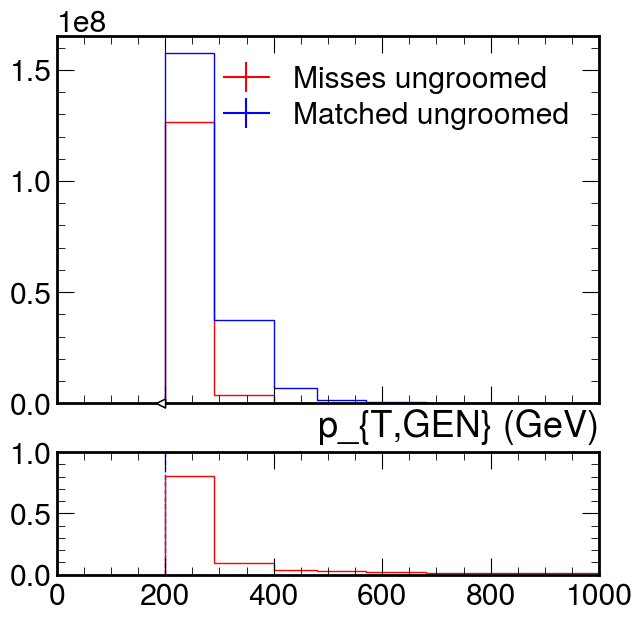

In [10]:
#### Plot dijet systematics
histname="misses"
print(result_mc["misses"][{'syst':'nominal'}])
print(result_mc["ptgen_mgen_u"][{'syst':'nominal'}])
axVar = "ptgen"
edges = [bin[0] for bin in result_mc[histname].project(axVar).axes[0]] + [result_mc[histname].project(axVar).axes[0][-1][1]]
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, (ax, rax) = plt.subplots(
                nrows=2,
                ncols=1,
                figsize=(7,7),
                gridspec_kw={"height_ratios": (3, 1)},
                sharex=True)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=ax, linestyle ='-', color = 'red', linewidth=1, label = 'Misses ungroomed')
ax.set_xlim(0, 1000)
rax.set_xlim(0, 1000)
histname="ptgen_mgen_u"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project(axVar), stack=False, histtype='step', binwnorm=True, 
             ax=ax, linestyle ='-', color = 'blue', linewidth=1, label = "Matched ungroomed")
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptgen"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Matched events ungroomed")
# histname = "fakes"
# axVar="mreco"
# print(result_mc[histname])
# availAxes = [ax.name for ax in result_mc[histname].axes]
# availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
# print([ax for ax in result_mc[histname].project("syst").axes[0]])
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
# hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
#              ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
ratio_misses = np.divide(result_mc["misses"][{'syst':"nominal"}].project(axVar).values(),result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values(),
                      out=np.empty(np.array(result_mc["misses"][{'syst':"nominal"}].project(axVar).values()).shape).fill(np.nan),
                      where=result_mc["ptgen_mgen_u"][{'syst':"nominal"}].project(axVar).values()!= 0,)
hep.histplot(np.ones_like(ratio_misses), edges, stack=False, histtype='step',ax=rax, density=False, linestyle ="--", color = 'blue', linewidth=1)
hep.histplot(ratio_misses, edges, stack=False, histtype='step', ax=rax, density=False, linestyle ="-", color = 'red', linewidth=1)
leg = ax.legend(loc='best', labelspacing=0.25)
leg.set_visible(True)
rax.set_ylim(0, 1.0)

ValueError: The axis name rapidity could not be found

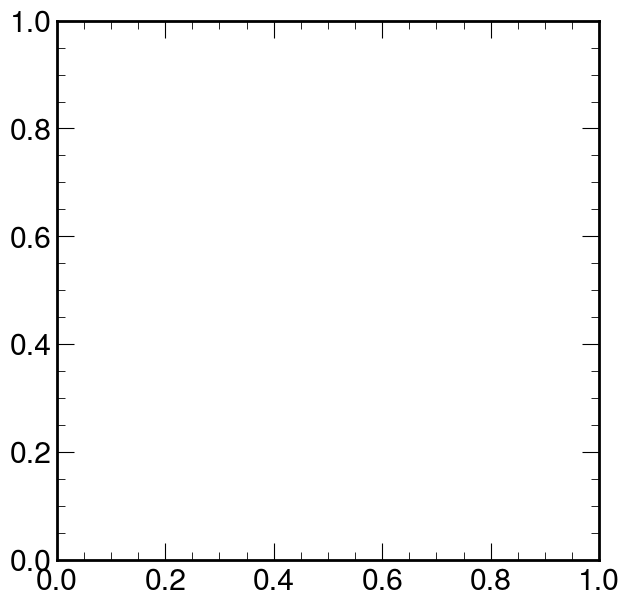

In [11]:
######## Plotting eta phi to check against jet veto maps
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
phi_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("phi").axes[0]] + [result_mc["jet_eta_phi"].project("phi").axes[0][-1][1]]
rap_edges = [bin[0] for bin in result_mc["jet_eta_phi"].project("rapidity").axes[0]] + [result_mc["jet_eta_phi"].project("rapidity").axes[0][-1][1]]
print(phi_edges)
print(rap_edges)
hep.hist2dplot(result_mc["jet_eta_phi"][{"syst":"nominal"}].project("rapidity", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
hep.cms.label("Preliminary", data = False, year = year, loc=0, ax=ax, fontsize=16)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
######## Plotting eta phi to check against jet veto maps
fig, ax = plt.subplots(
                    nrows=1,
                    ncols=1,
                    figsize=(7,7),)
hep.hist2dplot(result_data["jet_eta_phi"][{"syst":"nominal"}].project("rapidity", "phi"))
ax.set_xlim(-3.0, 3.0)
ax.set_ylim(-3.14, 3.14)
ax.set_ylabel(r'Jet $\phi$')
ax.set_xlabel(r'Jet $\eta$')
hep.cms.label("Preliminary", data = True, loc=0, year = year, ax=ax, fontsize=16)

In [ ]:
mc_ax = 'ptreco_mreco'
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_u"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_u"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_u"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mreco':i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_u_"+year+".png")

In [ ]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+"_g"].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+"_g"].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+"_g"].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,20)

fig, axs = plt.subplots(4, int(len(pt_bins)/2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_g"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':1*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':1*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,2E6])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtRecoMReco_g_"+year+".png")

In [ ]:
mcgen_ax = "ptgen_mgen"
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+1))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    print("Bin ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').values(flow=False))
    print("Uncertainty ", i, " ", result_mc[mcgen_ax+'_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen').variances())
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,4E7])
    # axm.set_xlim([0,1000])
    # axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.2, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue',
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', 
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_u'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
print("Bin under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').values(flow=False))
print("Uncertainty under ", result_mc[mcgen_ax+'_u'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen').variances())
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.subplots_adjust(wspace=0.0, hspace=0.10)
plt.savefig(os_path+"/unrolledPtGenMGen_u_"+year+".png")

In [ ]:
print(result_mc['response_matrix_u'])
pt_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mcgen_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mcgen_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mcgen_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)+2))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i+1]
    axm = axs.flatten()[i+2+len(pt_bins)]
    hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red',binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue',flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', flow='show',
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    ax.set_xlim([0,1000])
    ax.set_ylim([0,4E7])
    axm.set_xlim([0,1000])
    axm.set_ylim([0,1E7])
plt.subplots_adjust(wspace=0.0, hspace=0.20)
hep.histplot(result_mc[mcgen_ax+'_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'ptgen':hist.underflow, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=axs[0,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc[mcgen_ax+'_g'][{'mgen':hist.underflow,  'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
hep.histplot(result_mc['response_matrix_g'][{'mgen':hist.underflow, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axs[1,0], density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled pT<200GeV'])
# axs[0,0].set_xlim([0,1000])
# axs[0,0].set_ylim([0,4E7])
# print(result_mc['response_matrix_u'][hist.underflow])
plt.savefig(os_path+"/unrolledPtGenMGen_g_"+year+".png")

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_JetHT_pt200.0_rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
# fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
year = fname[-8:-4]
fname = "coffeaOutput/trijetHists_QCDsim_pt200.0_eta2.4_bbloose.pkl"
with open(fname, "rb") as f:
    result_mc_old = pickle.load( f )[0]
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print(result_mc.keys())
print(result_data.keys())
# print(result_mc["cutflow"])
print(result_mc["jet_rap_reco"].axes)
print(result_data["asymm_reco"].axes)
checkdir(os_path)

In [ ]:
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "ptreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_u", 'ptreco_mreco_u', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "ptreco_mreco_g", 'ptreco_mreco_g', "mreco", IOV=2018, channel = "trijet", norm=True)
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "asymm_reco", 'asymm_reco', "frac", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "dphimin_reco", 'dphimin_reco', "dphi", 
           IOV=2018, channel = "trijet")

In [ ]:

histname="fakes"
availAxes = [ax.name for ax in result_mc[histname].axes]
availSysts = [ax for ax in result_mc[histname].project("syst").axes[0]]
print([ax for ax in result_mc[histname].project("syst").axes[0]])
print("Available axes: ", availAxes)
print("Available systs ", availSysts)
fig, axs = plt.subplots(2,2,figsize=(20,14),)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'red', linewidth=1, label = 'fakes ungroomed')
axs.flatten()[0].set_xlim(0, 300)
histname="fakes_g"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("mreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[0], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("ptreco"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[1], linestyle ='-', color = 'blue', linewidth=1, label = "Fakes groomed")
axs.flatten()[1].set_xlim(0, 2000)
histname = "fakes_eta_phi"
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("eta"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[2], linestyle ='-', color = 'red', linewidth=1,)
hep.histplot(result_mc[histname][{'syst':"nominal"}].project("phi"), stack=False, histtype='step', binwnorm=True, 
             ax=axs.flatten()[3], linestyle ='-', color = 'red', linewidth=1,)
for ax in axs.flatten():
    leg = ax.legend(loc='best', labelspacing=0.25)
    leg.set_visible(True)

In [ ]:
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptreco').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mreco').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptreco').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)

fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptreco':i,'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptreco':i, 'syst':'nominal'}].project('mreco'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_g'][{'mreco':2*i,'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mreco':2*i, 'syst':'nominal'}].project('ptreco'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,1000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtRecoMReco"+year+".png")

In [ ]:
mc_ax = "ptgen_mgen"
pt_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('ptgen').axes[0]]
m_bins = [bin[0] for bin in result_mc[mc_ax+'_u'].project('mgen').axes[0]]
lastbin = result_mc[mc_ax+'_u'].project('ptgen').axes[0][-1][1]
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
# pt_bins.append(lastbin)
print(pt_bins)
print(len(pt_bins))
print(m_bins)
plt.rcParams["figure.figsize"] = (50,10)
fig, axs = plt.subplots(2, int(len(pt_bins)))
for i, bin in enumerate(pt_bins):
    ax = axs.flatten()[i]
    axm = axs.flatten()[i+len(pt_bins)]
    hep.histplot(result_mc[mc_ax+"_u"][{'ptgen':i,'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'ptgen':i, 'syst':'nominal'}].project('mgen'), stack=False, histtype='errorbar',
                         ax=ax, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(pt_bins[i])])
    hep.histplot(result_mc[mc_ax+"_u"][{'mgen':i,'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'blue', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    hep.histplot(result_mc['response_matrix_u'][{'mgen':i, 'syst':'nominal'}].project('ptgen'), stack=False, histtype='errorbar',
                         ax=axm, density=False, marker =["o"], color = 'red', binwnorm=True,
                         label=['Dijet Mass Unrolled' + str(m_bins[i])])
    # ax.set_xlim([0,2000])
    # ax.set_ylim([0,10000])
    # axm.set_xlim([0,2000])
    # axm.set_ylim([0,10000])
plt.subplots_adjust(wspace=0.0, hspace=0.0)
plt.savefig(os_path+"/unrolledPtGenMGen.png")

In [ ]:
mc_ax = "ptreco_mreco"
plt.rcParams["figure.figsize"] = (20,10)
print(result_mc.keys())
axis_names = [ax.name for ax in result_mc[mc_ax+'_u'].axes]
print(axis_names)
cats = [cat for cat in result_mc[mc_ax+'_u'][{'ptreco':sum, 'mreco':sum}].axes[0]]
pt_bins = [bin for bin in result_mc[mc_ax+'_u'].project("ptreco").axes[0]]
print(pt_bins)
fig, axs = plt.subplots(2, 2)
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
print(cats)
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (top) and groomed (bottom) reco jets')
# mc = [result['jet_pt_mass_reco_u'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_u'][{'dataset':sum}].project('mreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('ptreco'), 
#       result['jet_pt_mass_reco_g'][{'dataset':sum}].project('mreco')]
data = [result_data['ptreco_mreco_u'][{'syst':'nominal'}].project('mreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('mreco'),
       result_data['ptreco_mreco_u'][{ 'syst':'nominal'}].project('ptreco'), 
        result_data['ptreco_mreco_g'][{ 'syst':'nominal'}].project('ptreco')]
mc_old = [result_mc_old['jet_pt_mass_reco_u'].project('mreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('mreco'),
       result_mc_old['jet_pt_mass_reco_u'].project('ptreco'), 
        result_mc_old['jet_pt_mass_reco_g'].project('ptreco')]
for i, ax in enumerate(axs.flatten()):
    hep.histplot(data[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = 'black',
                         label=['Trijet Data'])
    hep.histplot(mc_old[i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["."], color = 'teal',
                         label=['MC w/o xs scaling'])
    for j in range(len(cats)):
        syst=cats[j]
        mc = [result_mc[mc_ax+'_u'][{ 'syst':syst}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('mreco'),
             result_mc[mc_ax+'_u'][{'syst':syst}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':syst}].project('ptreco')]
        hep.histplot(mc[i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"],
                             color = colors[j], linewidth=1,
                         label=['QCD sim '+syst])
    ax.legend()
axs[0,0].set_yscale('log')
axs[1,0].set_yscale('log')
axs[0,1].set_yscale('log')
axs[1,1].set_yscale('log')
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJESlog.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
fig = plt.figure()
fig.suptitle('Trijet Data and MC w/ JER+JES corrections ungroomed (left) and groomed (right) reco jets')
grids = fig.add_gridspec(2,2, figure=fig, wspace=0.1, hspace=0.1)
subgrids = [grid.subgridspec(4,1, wspace=0, hspace=0) for grid in grids]
mc = [result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('mreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('mreco'),
      result_mc[mc_ax+'_u'][{'syst':'nominal'}].project('ptreco'), result_mc[mc_ax+'_g'][{'syst':'nominal'}].project('ptreco')]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='errorbar',binwnorm=True,
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
for i, sg in enumerate(subgrids):
    num = data[i]
    denom = mc[i]
    main_ax = fig.add_subplot(sg[:-1, :])
    # main_ax.set_yscale("log")
    subplot_ax = fig.add_subplot(sg[-1, :], sharex=main_ax)
    plt.setp(main_ax.get_xticklabels(), visible=False)
    main_ax, sublot_ax = num.plot_ratio(denom,
                                        rp_num_label="data",
                                        rp_denom_label="mc",
                                        rp_uncert_draw_type="line",
                                        ax_dict = {"main_ax":main_ax,"ratio_ax":subplot_ax}
                                               )
    plt.ylabel("Data/MC")
plt.savefig(os_path+"/compareDataMC_wXSscaling_wJERJES.png")

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_NoneHEMveto2018.pkl"
with open(fname, "rb") as f:
    result_data = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_mc = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("DATA KEYS ", result_data.keys())
print("MC KEYS ", result_mc.keys())

In [ ]:
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "ptreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_pt_mass_reco_u", 'jet_pt_mass_reco_u', "mreco", 
           IOV=2018, channel = "trijet")
plotDataMC(result_mc, result_data, "jet_rap_reco", 'jet_rap_reco', "rapidity", 
           IOV=2018, channel = "trijet")
#plotDataMC(result_mc, result_data, "jet_dphi_reco", 'jet_dphi_reco', "dphi", IOV=2018, channel = "trijet")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2016.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
def plotratio_cms(num, denom, ax, color, label):
    ratio = num.values() /  denom.values()
    ratio[ratio == 0] = np.nan
    ratio[np.isinf(ratio)] = np.nan
    hep.histplot(ratio, bins = num.axes.edges[0], stack=False, histtype='step',
                         ax=ax, density=False, linestyle =["-"], color = color, linewidth=1,
                         label=[label])
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("Softest Trijet QCD_binnned MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2016.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2016 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("Sotest Trijet QCD_binned MC 2016")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2016.png")

In [ ]:
import matplotlib.pyplot as plt
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2017.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2017.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity nobtag ", result_nobtag['cutflow']['nSoftestGluonJets']/result_nobtag['cutflow']['n3Jets'])
print("Gluon purity all jets ", result_nobtag['cutflow']['nSoftestJets']/(result_nobtag['cutflow']['nJets']))
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2017")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagComparison2017.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2017 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2017")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2017.png")

In [ ]:
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbloosejesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbloose = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bbmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bbmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_bmedjesjec2018.pkl"
with open(fname, "rb") as f:
    result_bmed = pickle.load( f )
fname = "coffeaOutput/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_Nonejesjec2018.pkl"
with open(fname, "rb") as f:
    result_nobtag = pickle.load( f )
os_path = 'plots/comparison/trijet/'
checkdir(os_path)
print("Gluon purity bbloose ", result_bbloose['cutflow']['nGluonJets']/result_bbloose['cutflow']['n3Jets'])
print("Gluon purity bloose ", result_bloose['cutflow']['nGluonJets']/result_bloose['cutflow']['n3Jets'])
print("Gluon purity bbmed ", result_bbmed['cutflow']['nGluonJets']/result_bbmed['cutflow']['n3Jets'])
print("Gluon purity bmed ", result_bmed['cutflow']['nGluonJets']/result_bmed['cutflow']['n3Jets'])
print("Gluon purity no btag ", result_nobtag['cutflow']['nGluonJets']/result_nobtag['cutflow']['n3Jets'])
print(result_nobtag['cutflow'].keys())

In [ ]:
#### B TAG PLOTS OLD WAY
bloose_num = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bloose['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bloose['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bloose_denom = [result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bloose['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bloose['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbloose_num = [result_bbloose['jet_pt'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('ptgen'), 
               result_bbloose['jet_mass'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('mgen'), 
               result_bbloose['jet_eta'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('eta'), 
               result_bbloose['btag'][{'partonFlav':"Gluon", 'jetNumb':'jet3'}].project('frac') ]
bbloose_denom = [result_bbloose['jet_pt'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptgen'), 
                 result_bbloose['jet_mass'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mgen'), 
                 result_bbloose['jet_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbloose['btag'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bbmed_num = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bbmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bbmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bbmed_denom = [result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bbmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bbmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
bmed_num = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_bmed['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_bmed['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
bmed_denom = [result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_bmed['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_bmed['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nobtag_num = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result_nobtag['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result_nobtag['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result_nobtag['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result_nobtag['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
nums = [bloose_num, bbloose_num, bmed_num, bbmed_num, nobtag_num]
denoms = [bloose_denom, bbloose_denom, bmed_denom, bbmed_denom, nobtag_denom]
btag_names = ['bloose', 'bbloose', 'bmed', 'bbmed', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2018")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2018")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018.png")

In [ ]:
fname = "coffeaOutput/dijetHists_wXSscaling_QCDsim_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result['cutflow'].keys())
print("fakes: ", result['cutflow']["fakes nominal"])
print("misses: ", result['cutflow']["misses nominal"])

In [ ]:
fname = "coffeaOutput/dijetHists_JetHT_pt200.0_rapidity2.5jesjecL1PU2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijetHists_JetHT_pt200.0_rappidity2.5_Nonejesjec2016.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
for key in list(result['cutflow'].keys()):
    if "nEvents" in key:
        print(key, ": ", result['cutflow'][key])
print(result["cutflow"].keys())

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity2.5_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
fname = "coffeaOutput/trijet/trijetHists_wXSscaling_QCDsim_pt200.0rapidity1.7_nominal2018.pkl"
with open(fname, "rb") as f:
    result = pickle.load( f )
print(result.keys())
print(result['alljet_ptreco_mreco'])
print(result["cutflow"].keys())
print("Gluon fraction: ", result['cutflow']['nSoftestGluonJets']/result['cutflow']['n3Jets'])

In [ ]:
nobtag_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3'}].project('frac') ]
nobtag_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3'}].project('frac') ]
pdgbb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_bb'}].project('frac') ]
pdgbb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_bb'}].project('frac') ]
pdgb_num = [result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('ptreco'), 
               result['alljet_ptreco_mreco'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('mreco'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('eta'), 
               result['btag_eta'][{'partonFlav':'Gluon', 'jetNumb':'jet3_b'}].project('frac') ]
pdgb_denom = [result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('ptreco'), 
                 result['alljet_ptreco_mreco'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('mreco'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('eta'), 
                 result['btag_eta'][{'partonFlav':sum, 'jetNumb':'jet3_b'}].project('frac') ]
nums = [pdgbb_num, pdgb_num, nobtag_num]
denoms = [pdgbb_denom, pdgb_denom, nobtag_denom]
btag_names = ['pdg bb', 'pdg b', 'nobtag']
colors = ['k', 'b', 'g', 'r', 'orange', 'c', 'm']
xlabels = ['$p_{T, GEN} [GeV]$', '$M_{GEN} [GeV]$', '$\eta$', 'B Discriminator value']
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 test btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        plotratio_cms(nums[j][i], denoms[j][i], axs.flatten()[i], colors[j], btag_names[j])
        ax.set_title("MC 2016")
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Gluon fraction")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btagRatios2018test.png")

In [ ]:
plt.rcParams["figure.figsize"] = (20,20)
plt.rc('legend',fontsize='small')
fig = plt.figure()
fig, axs = plt.subplots(2, 2)
fig.suptitle('2018 btag studies')
for j in range(len(btag_names)):
    for i, ax in enumerate(axs.flatten()):
        hep.histplot(nums[j][i], stack=False, histtype='step', binwnorm=1,
                         ax=ax, density=False, linestyle =["-"], color = colors[j], linewidth=1,
                         label=['Gluon jets '+btag_names[j]])
        hep.histplot(denoms[j][i], stack=False, histtype='errorbar', binwnorm=1,
                         ax=ax, density=False, marker =["*"], color = colors[j],
                         label=['All jets '+btag_names[j]])
        ax.set_title("QCD_binned MC 2016 test")
        ax.set_yscale('log')
        ax.set_xlabel(xlabels[i])
        ax.set_ylabel("Events")
        ax.legend()
axs.flatten()[0].set_xlim([0,2200])
plt.savefig(os_path+"/btaggedJets2018test.png")

In [ ]:
axis_names = [ax.name for ax in result_mc['jet_pt_mass_reco_u'].axes]
print(axis_names)
plt.rcParams["figure.figsize"] = (20,15)
fig, axs = plt.subplots(3, 3)
print(result['jet_mass'])
result['jet_mass'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,0], overlay='partonFlav')
plt.rc('legend',fontsize='small')
axs[0,0].set_xlabel("Jet1 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,1], overlay='partonFlav')
axs[0,1].set_xlabel("Jet1 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet1', 'dataset':sum}].plot1d(ax = axs[0,2], overlay='partonFlav')
axs[0,2].set_xlabel("Jet1 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,0], overlay='partonFlav')
axs[1,0].set_xlabel("Jet2 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,1], overlay='partonFlav')
axs[1,1].set_xlabel("Jet2 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet2', 'dataset':sum}].plot1d(ax = axs[1,2], overlay='partonFlav')
axs[1,2].set_xlabel("Jet2 eta (GeV)")
result['jet_mass'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,0], overlay='partonFlav')
axs[2,0].set_xlabel("Jet3 mass (GeV)")
result['jet_pt'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,1], overlay='partonFlav')
axs[2,1].set_xlabel("Jet3 pT (GeV)")
result['jet_eta'][{'jetNumb':'jet3', 'dataset':sum}].plot1d(ax = axs[2,2], overlay='partonFlav')
axs[2,2].set_xlabel("Jet3 eta (GeV)")
for ax in axs.flatten():
    ax.legend()
print(axs)
fig.suptitle('Dijet eta <2.5, pt> 200.', fontsize="large")
plt.savefig(os_path+'/singleJetPtEtaPhi_partons' + ".png")